<a href="https://colab.research.google.com/github/VuongDS/Covid-19-data-analysis/blob/main/Asm2_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [ ]:
'''
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
'''


'\n!pip install pycountry_convert \n!pip install folium\n!pip install seaborn\n!pip install plotly\n'

In [ ]:
!pip3 -q install pycountry-convert

In [ ]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
from matplotlib.pyplot import figure
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [ ]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [ ]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,203942,204094,204287,204392,204417,204510,204610,204724,204820,204982
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333071,333088,333103,333125,333138,333156,333161,333197,333215,333233
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,270891,270906,270917,270924,270929,270939,270952,270969,270981,270996
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46588,46664,46664,46664,46664,46664,46664,46664,46824,46824
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131


In [ ]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7829,7829,7829,7829,7829,7829,7829,7829,7830,7830
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3593,3593,3593,3593,3593,3593,3594,3594,3594,3594
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,155,155,155,155,155,155,155,155,156,156
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


In [ ]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# vì recoveries_df đã dừng cập nhật data
# nên những ngày sau đó sử dụng data của ngày cuối cùng có data
recoveries = recoveries_df.iloc[:, 4:-1]
# tìm ngày cuối cùng có data
zero_column = []
for value in recoveries:
    if recoveries[value].sum() == 0:
        print('This column not contain value:',pd.DataFrame(recoveries[value]).columns)
        # assign zolumns contain 0 value to list 
        zero_column.append(pd.DataFrame(recoveries[value]).columns) 
        break

This column not contain value: Index(['8/5/21'], dtype='object')


In [ ]:
# tìm index của ngày đầu tiên không có data
index = recoveries.columns.get_loc(pd.DataFrame(zero_column).iloc[0,0])
index

561

In [ ]:
# thay thế toàn bộ data phía sau
zero_value_recoveries = recoveries_df.iloc[:,561:]
for value in zero_value_recoveries:
    recoveries_df[value] = recoveries_df.iloc[:,index]

In [ ]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130243,130243,130243,130243,130243,130243,130243,130243,130243,130243
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,116009,116009,116009,116009,116009,116009,116009,116009,116009,116009
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14210,14210,14210,14210,14210,14210,14210,14210,14210,14210
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,37397,37397,37397,37397,37397,37397,37397,37397,37397,37397


#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [ ]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = confirmed.sum() 
total_deaths = deaths.sum()
total_recovered = recoveries.sum()
mortality_rate = (total_deaths/total_cases)*100
recovery_rate = (total_recovered/total_cases)*100
total_active = total_cases - total_deaths - total_recovered
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Insert your code here:



In [ ]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  636978308
Total death cases:  6617699
Total recoveries cases:  129994389
Total active cases:  500366220


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

In [ ]:
# convert day units to dataframe
adjusted_dates = pd.DataFrame(adjusted_dates)
adjusted_dates.columns = ['adjusted_dates']

In [ ]:
# Create new group to visualize
name = [total_cases, total_deaths, total_recovered, total_active]
Group = pd.concat([total_cases, total_deaths, total_recovered, total_active], axis = 1)
Group.rename(columns={0:'total_cases', 1:'total_deaths', 2:'total_recovered', 3:'total_active'}, inplace=True)

In [ ]:
# set day units index
Group.set_index(adjusted_dates['adjusted_dates'], inplace=True) 

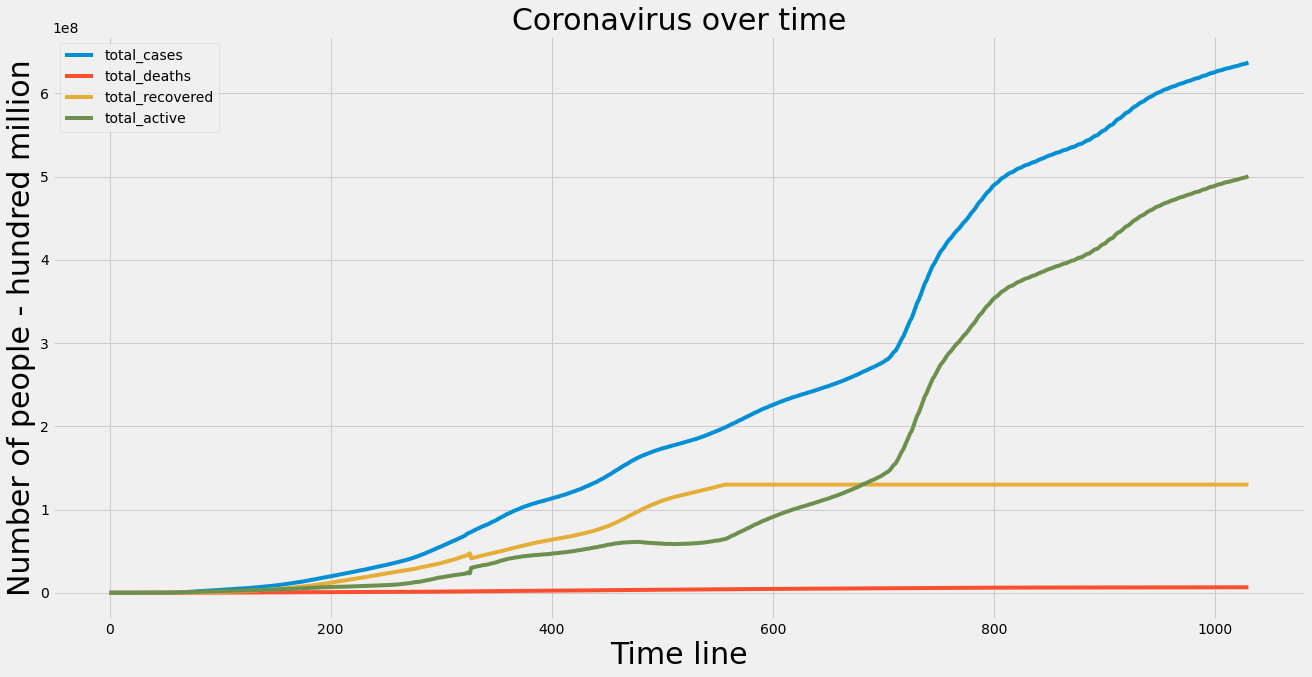

In [ ]:
# Visualize by number
Group.plot(kind='line',
             stacked=False,
             figsize=(20, 10), 
             )

plt.title('Coronavirus over time', fontsize = 30)
plt.ylabel('Number of people - hundred million', fontsize = 30)
plt.xlabel('Time line', fontsize = 30)

plt.show()

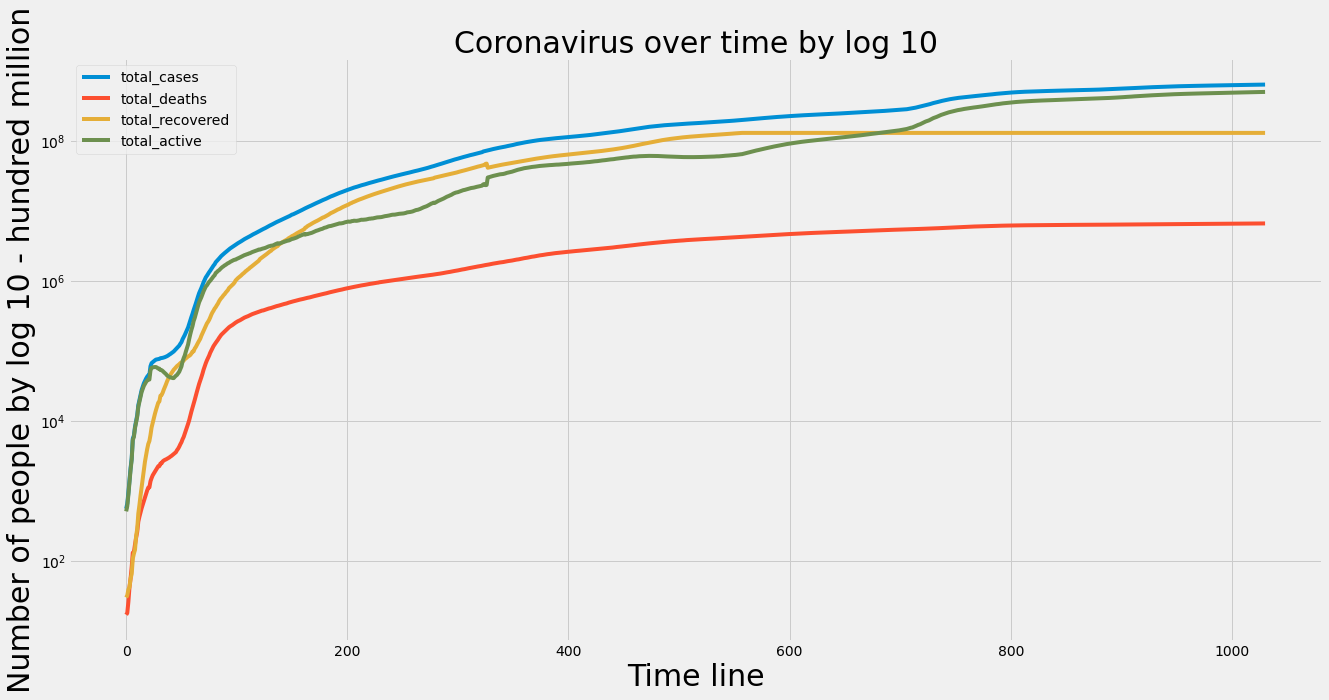

In [ ]:
# visualize by log10
Group.plot(kind='line', logy = True,
             stacked=False,
             figsize=(20, 10), 
             )

plt.title('Coronavirus over time by log 10', fontsize = 30)
plt.ylabel('Number of people by log 10 - hundred million', fontsize = 30)
plt.xlabel('Time line', fontsize = 30)

plt.show()

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

In [ ]:
Group.head()

,total_cases,total_deaths,total_recovered,total_active
adjusted_dates,,,,
0,557,17,30,510
1,657,18,32,607
2,944,26,39,879
3,1437,42,42,1353
4,2120,56,56,2008


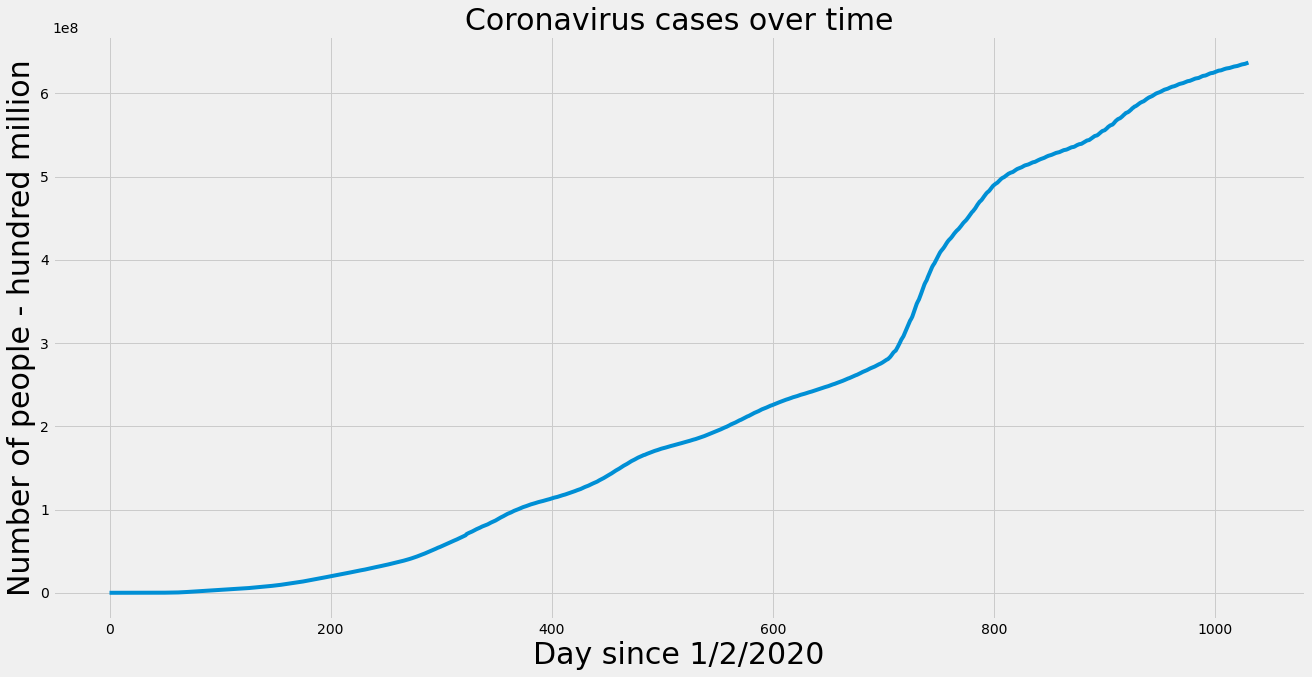

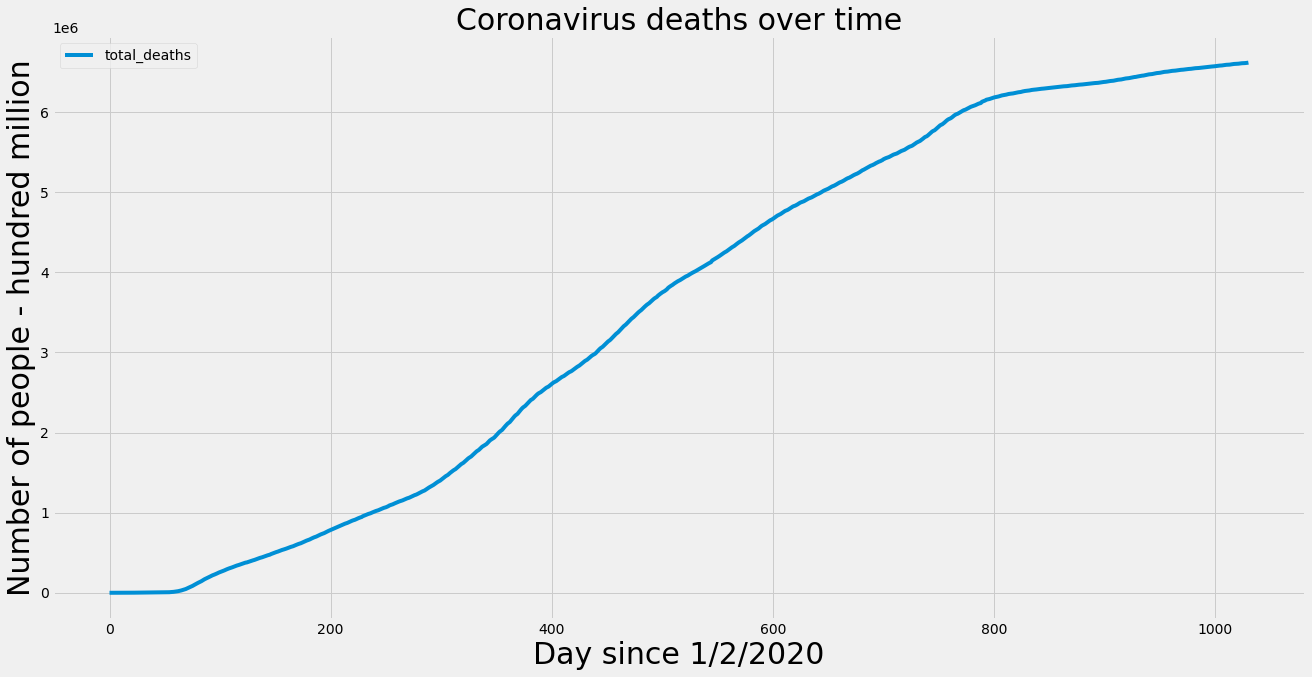

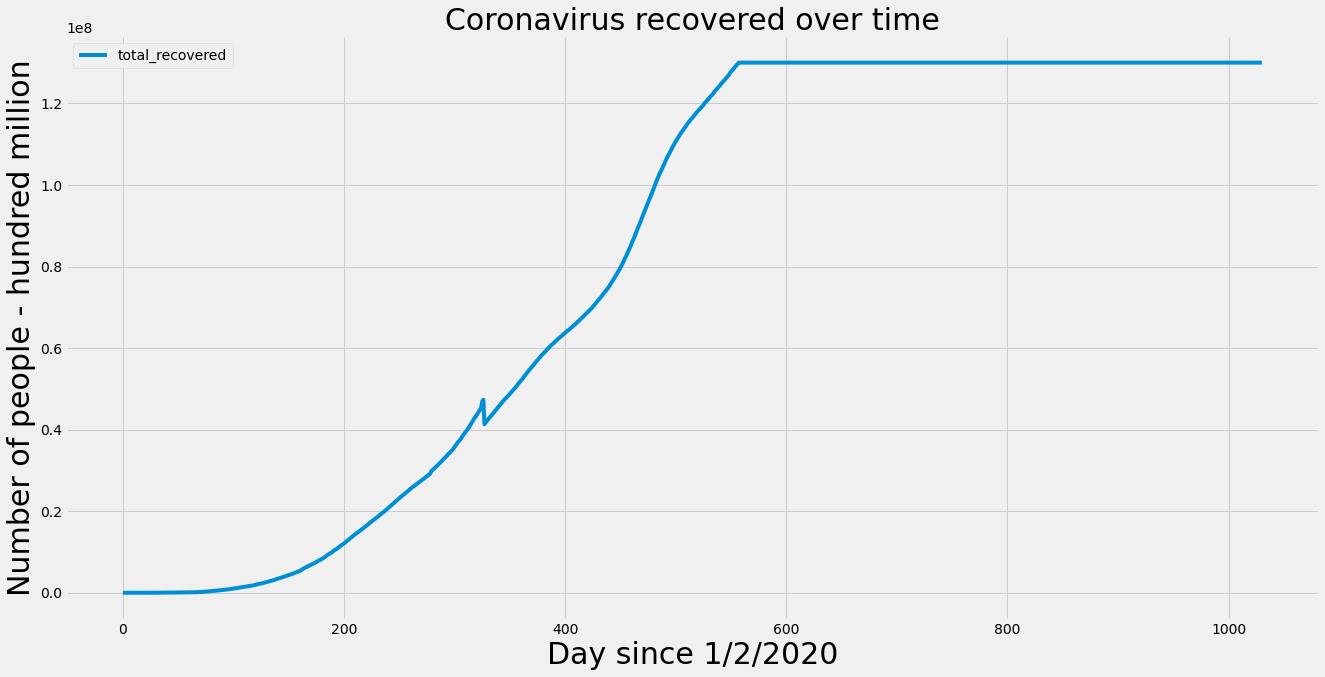

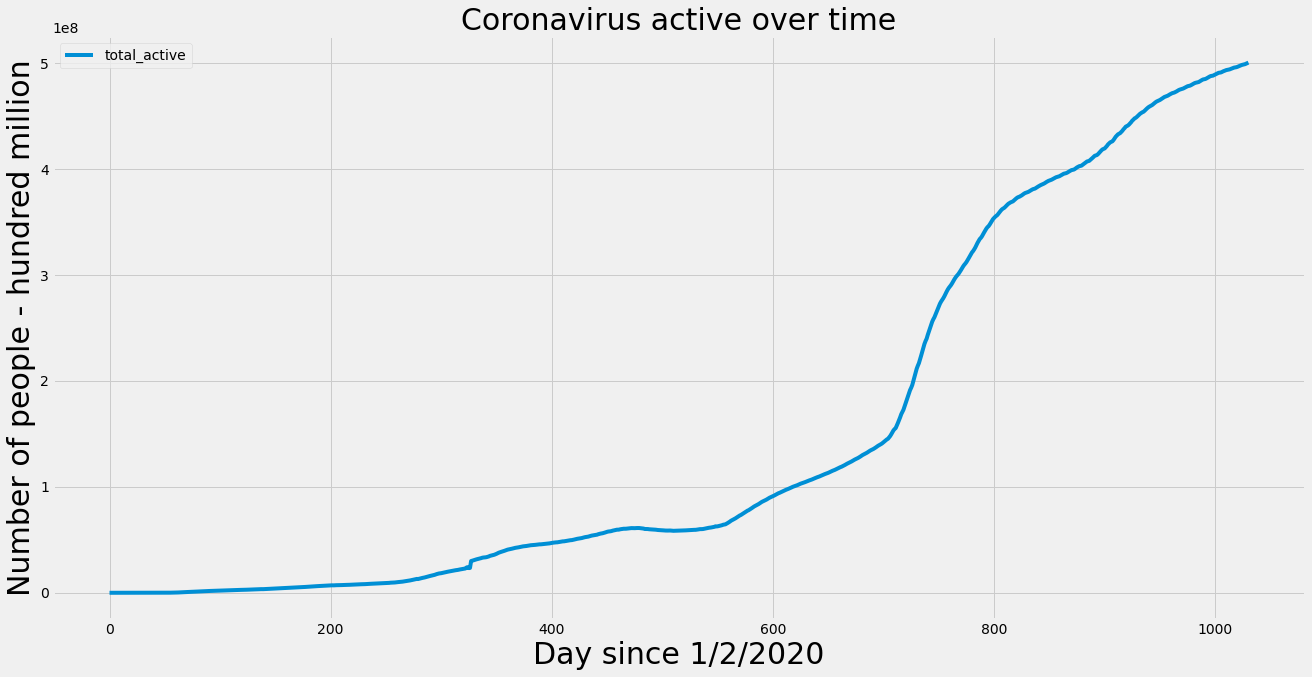

In [ ]:
# plot total cases
Group.iloc[:,0].plot(kind='line',
            stacked=False,
            subplots=True,
            layout=(1,1),
            figsize=(20, 10), 
             )

plt.title('Coronavirus cases over time', fontsize = 30)
plt.ylabel('Number of people - hundred million', fontsize = 30)
plt.xlabel('Day since 1/2/2020', fontsize = 30)

plt.show()

# plot total_deaths
Group.iloc[:,[1]].plot(kind='line',
            stacked=False,
            subplots=True,
            layout=(1,1),
            figsize=(20, 10), 
             )

plt.title('Coronavirus deaths over time', fontsize = 30)
plt.ylabel('Number of people - hundred million', fontsize = 30)
plt.xlabel('Day since 1/2/2020', fontsize = 30)

plt.show()

# plot total_recovered
Group.iloc[:,[2]].plot(kind='line',
            stacked=False,
            subplots=True,
            layout=(1,1),
            figsize=(20, 10), 
             )

plt.title('Coronavirus recovered over time', fontsize = 30)
plt.ylabel('Number of people - hundred million', fontsize = 30)
plt.xlabel('Day since 1/2/2020', fontsize = 30)

plt.show()

# plot total_active
Group.iloc[:,[3]].plot(kind='line',
            stacked=False,
            subplots=True,
            layout=(1,1),
            figsize=(20, 10), 
             )

plt.title('Coronavirus active over time', fontsize = 30)
plt.ylabel('Number of people - hundred million', fontsize = 30)
plt.xlabel('Day since 1/2/2020', fontsize = 30)

plt.show()

## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [ ]:
# Calculate the number of daily increases
Groupdiff = Group.diff().abs()

# set name for columns
pd.DataFrame(Groupdiff).columns = ['World Daily Increase Confirmed Cases', 
                                   'World Daily Increase Deaths Cases', 
                                   'World Daily Increase Recoveries Cases', 
                                   'World Daily Increase Active Cases']

In [ ]:
# quick check
Groupdiff.head()

,World Daily Increase Confirmed Cases,World Daily Increase Deaths Cases,World Daily Increase Recoveries Cases,World Daily Increase Active Cases
adjusted_dates,,,,
0,NaN,NaN,NaN,NaN
1,100.0,1.0,2.0,97.0
2,287.0,8.0,7.0,272.0
3,493.0,16.0,3.0,474.0
4,683.0,14.0,14.0,655.0


## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

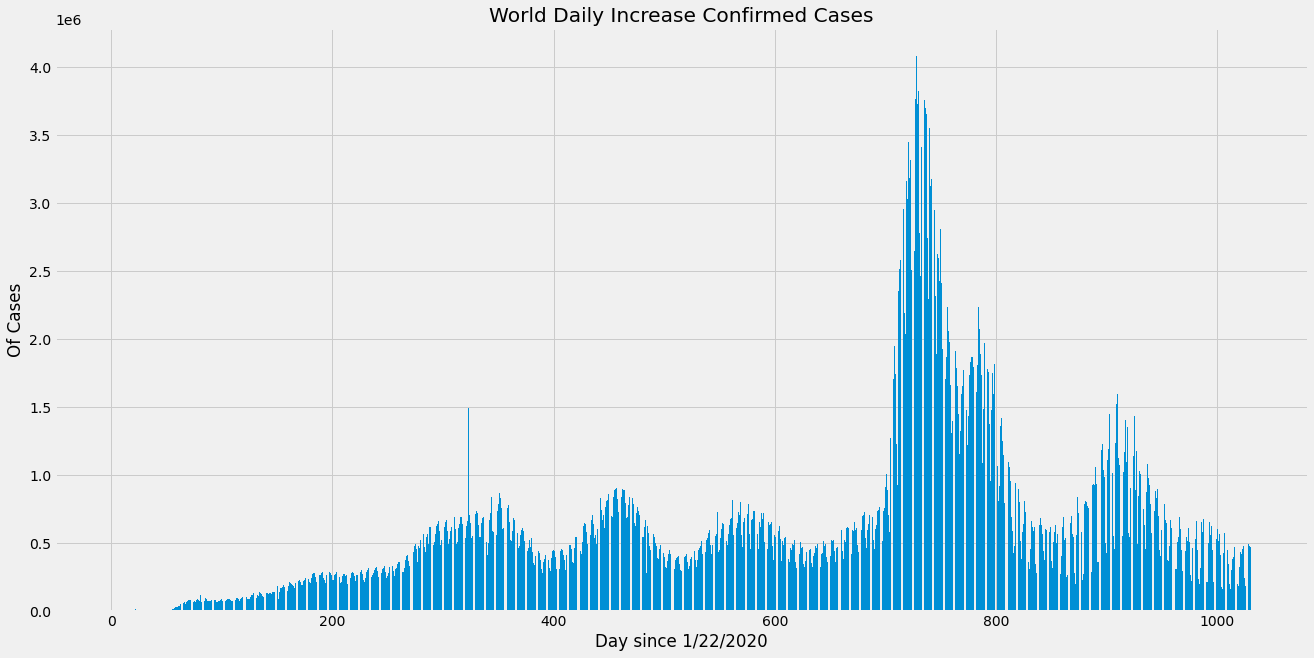

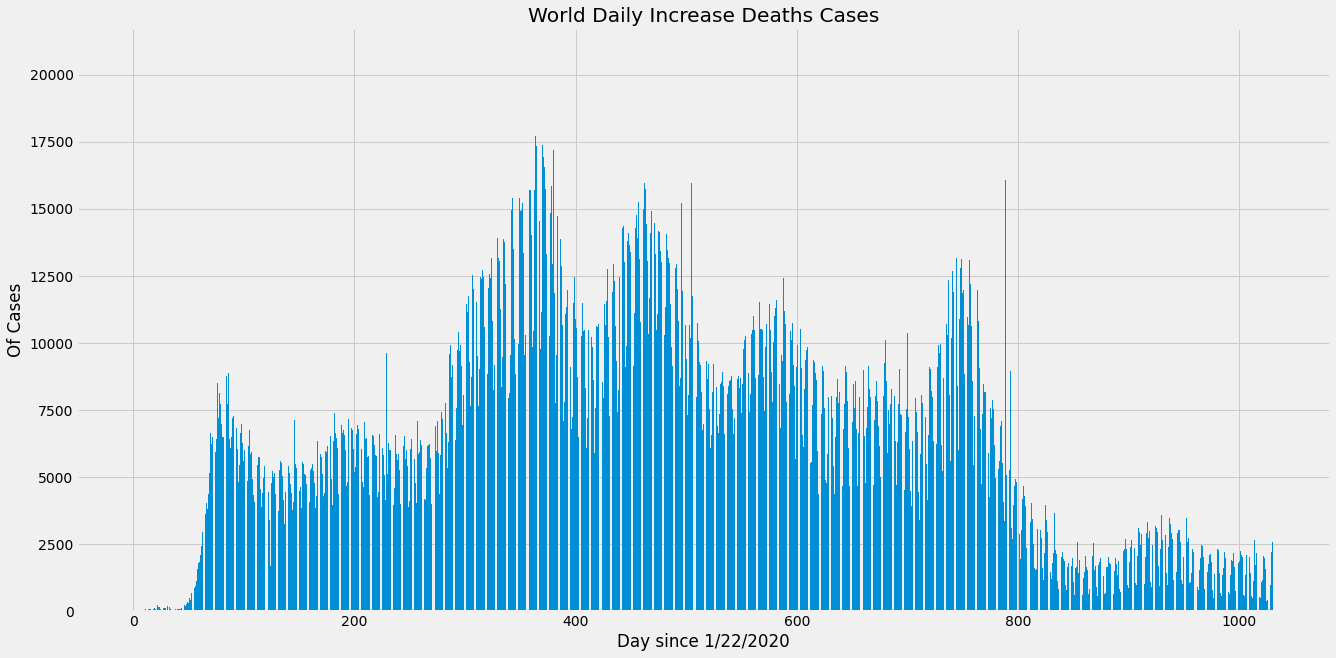

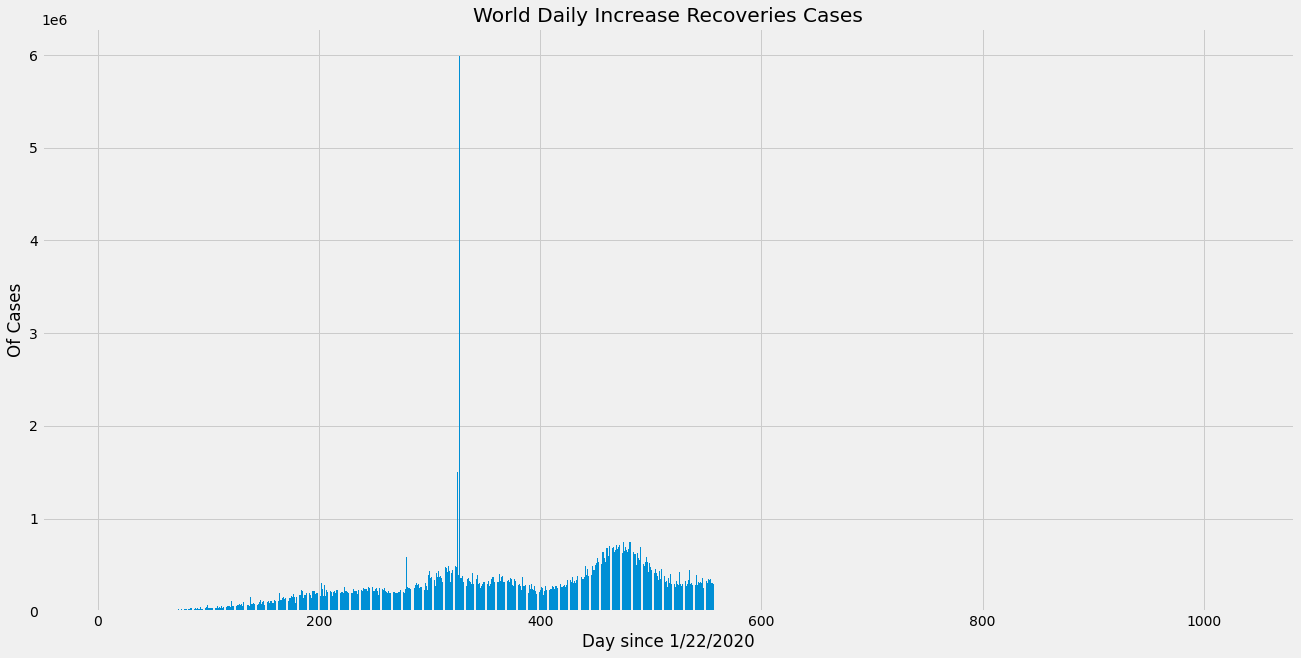

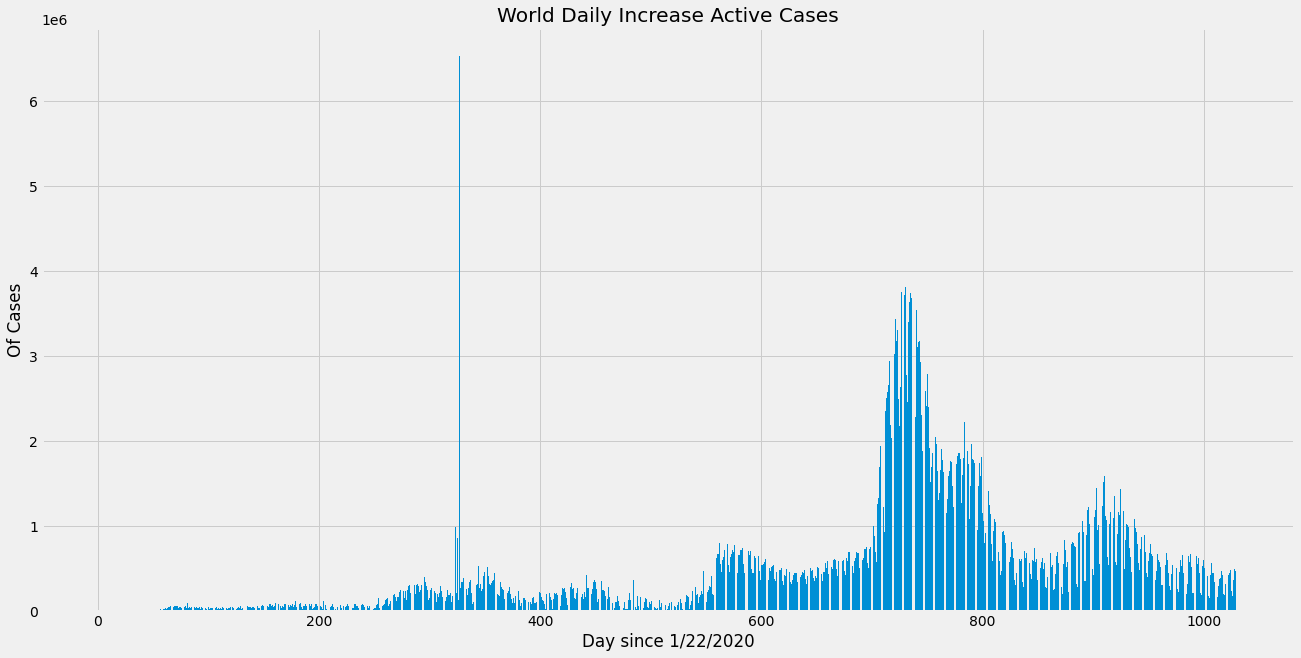

In [ ]:
# 1. Plot figure for "World Daily Increase Confirmed Cases"
fig, ax = plt.subplots(figsize=(20,10))

# Plot the data
x1 = Groupdiff.index
y1 = Groupdiff.iloc[:,0]
data_line = ax.bar(x1, y1, label='Data', linewidth=2.0)

# Set title and label
plt.title('World Daily Increase Confirmed Cases')
plt.ylabel('Of Cases')
plt.xlabel('Day since 1/22/2020')

plt.show()


# 2. Plot figure for "World Daily Increase Deaths Cases"
fig, ax = plt.subplots(figsize=(20,10))

# Plot the data
x1 = Groupdiff.index
y1 = Groupdiff.iloc[:,1]
data_line = ax.bar(x1, y1, label='Data', linewidth=2.0)

# Set title and label
plt.title('World Daily Increase Deaths Cases')
plt.ylabel('Of Cases')
plt.xlabel('Day since 1/22/2020')

plt.show()


# 3. Plot figure for "World Daily Increase Recoveries Cases"
fig, ax = plt.subplots(figsize=(20,10))

# Plot the data
x1 = Groupdiff.index
y1 = Groupdiff.iloc[:,2]
data_line = ax.bar(x1, y1, label='Data', linewidth=2.0)

# Set title and label
plt.title('World Daily Increase Recoveries Cases')
plt.ylabel('Of Cases')
plt.xlabel('Day since 1/22/2020')

plt.show()


# 4. Plot figure for "World Daily Increase Active Cases"
fig, ax = plt.subplots(figsize=(20,10))

# Plot the data
x1 = Groupdiff.index
y1 = Groupdiff.iloc[:,3]
data_line = ax.bar(x1, y1, label='Data', linewidth=2.0)

# Set title and label
plt.title('World Daily Increase Active Cases')
plt.ylabel('Of Cases')
plt.xlabel('Day since 1/22/2020')

plt.show()

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [ ]:
# 1. Create dataframe mortality with day units
# create datafram with index
mortality_percent = pd.DataFrame([Group.index, mortality_rate]).T 
# set name for column
mortality_percent.rename(columns={0:'Group.index', 1:'mortality_rate'}, inplace=True) 
# set day units index
mortality_percent.set_index('Group.index', inplace=True) 

# 2. Create dataframe recovery with day units
# create datafram with index
recovery_percent = pd.DataFrame([Group.index, recovery_rate]).T 
# set name for column
recovery_percent.rename(columns={0:'Group.index', 1:'recovery_rate'}, inplace=True) 
# set day units index
recovery_percent.set_index('Group.index', inplace=True) 

In [ ]:
mortality_percent.head()

,mortality_rate
Group.index,
0.0,3.052065
1.0,2.739726
2.0,2.754237
3.0,2.922756
4.0,2.641509


In [ ]:
recovery_percent.head()

,recovery_rate
Group.index,
0.0,5.385996
1.0,4.870624
2.0,4.131356
3.0,2.922756
4.0,2.641509


# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

In [ ]:
# calculate mean
mortality_percent_mean = [np.mean(mortality_percent)]*len(Group.index) 
# conver to data frame
mortality_percent_mean = pd.DataFrame(mortality_percent_mean)
# combine together
mortality_percent_frame = pd.concat([mortality_percent, mortality_percent_mean], axis = 1) 
# set columns name
mortality_percent_frame.columns =['mortality_percent', 'mortality_percent_mean'] 

In [ ]:
# quick check
mortality_percent_frame.head()

,mortality_percent,mortality_percent_mean
0.0,3.052065,2.547597
1.0,2.739726,2.547597
2.0,2.754237,2.547597
3.0,2.922756,2.547597
4.0,2.641509,2.547597


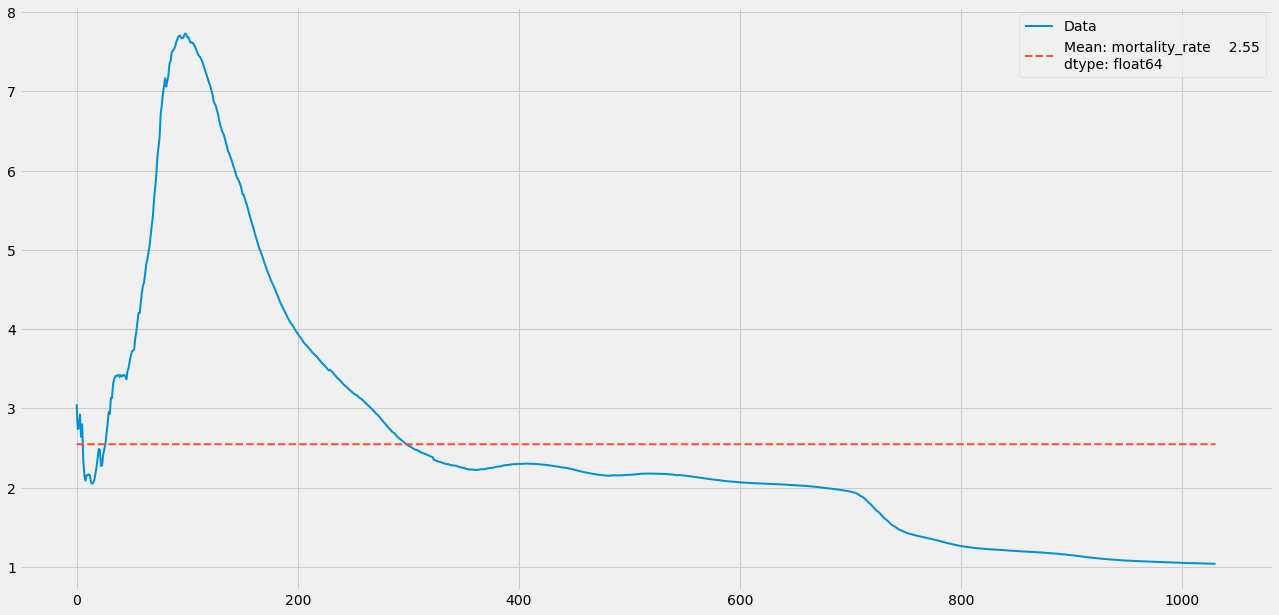

In [ ]:
# Plot figure and set size

fig,ax = plt.subplots(figsize=(20,10))

# Plot the data line
x1 = mortality_percent_frame.index
y1 = mortality_percent_frame.iloc[:,0]
data_line = ax.plot(x1, y1, label='Data', linewidth=2.0)

# Plot the average line
x2 = mortality_percent_frame.index
y2 = mortality_percent_frame.iloc[:,1]
mean_line = ax.plot(x2, y2, label='Mean', linestyle='--', linewidth=2.0)


# Set legend
mean_legend = np.mean(mortality_percent) # calculate mean value
round_legend = np.round(mean_legend, 2) # calculate round
plt.legend(["Data","Mean: {}".format(round_legend)])
plt.show()

**7.2** 

    Visualize the recoveried rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

In [ ]:
# calculate mean
recovery_percent_mean = [np.mean(recovery_percent)]*len(Group.index) 
# conver to data frame
recovery_percent_mean = pd.DataFrame(recovery_percent_mean)
# combine together
recovery_percent_frame = pd.concat([recovery_percent, recovery_percent_mean], axis = 1) 
# set columns name
recovery_percent_frame.columns =['recovery_percent_percent', 'recovery_percent_percent_mean'] 

In [ ]:
recovery_percent_frame.head()

,recovery_percent_percent,recovery_percent_percent_mean
0.0,5.385996,44.532729
1.0,4.870624,44.532729
2.0,4.131356,44.532729
3.0,2.922756,44.532729
4.0,2.641509,44.532729


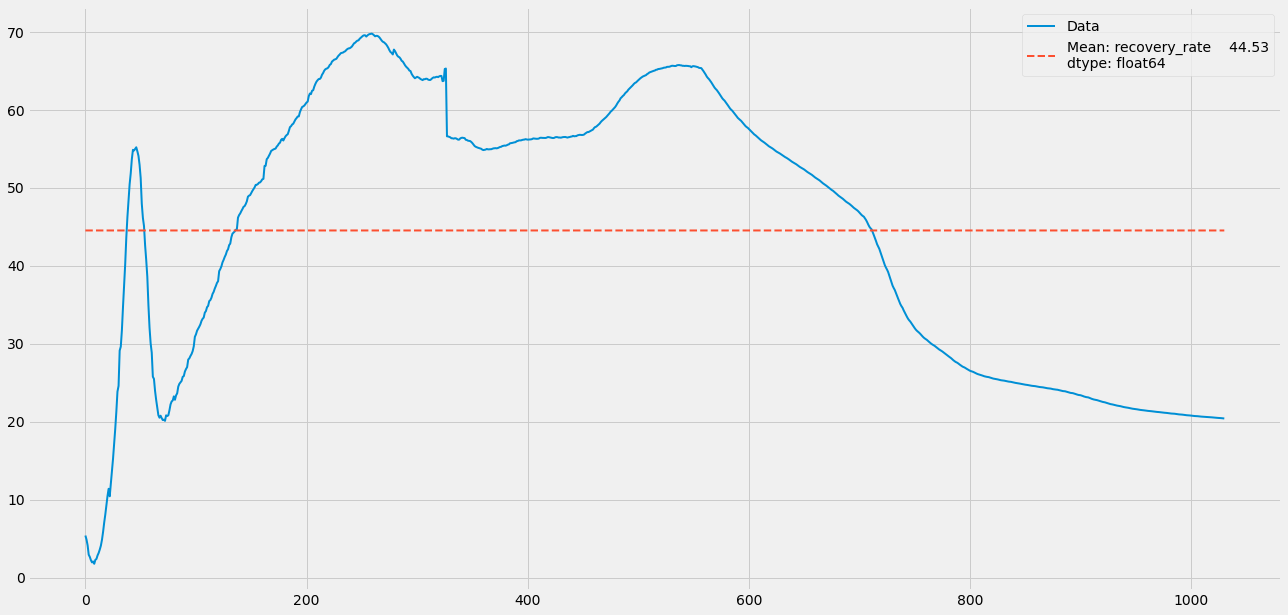

In [ ]:
# Plot figure and set size

fig,ax = plt.subplots(figsize=(20,10))

# Plot the data line
x1 = recovery_percent_frame.index
y1 = recovery_percent_frame.iloc[:,0]
data_line = ax.plot(x1, y1, label='Data', linewidth=2.0)

# Plot the average line
x2 = recovery_percent_frame.index
y2 = recovery_percent_frame.iloc[:,1]
mean_line = ax.plot(x2, y2, label='Mean', linestyle='--', linewidth=2.0)

# Set legend
mean_legend = np.mean(recovery_percent) # calculate mean value
round_legend = np.round(mean_legend, 2) # calculate round
plt.legend(["Data","Mean: {}".format(round_legend)])
plt.show()
plt.show()

#  5. Continent Analysis

## Data Prerocessing

In [ ]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Burma', "Country/Region"] = 'Myanmar'
deaths_df.loc[deaths_df['Country/Region'] == 'Burma', "Country/Region"] = 'Myanmar'
recoveries_df.loc[recoveries_df['Country/Region'] == "Burma", "Country/Region"] = "Myanmar"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


In [ ]:
# Get continen code for confirmed_df
lst_code_confirmed_df = []
for i in confirmed_df['Country/Region'].values:
    lst_code_confirmed_df.append(country_to_continent_code(i))


In [ ]:
# Create a list to contain continents name for confirmed_df
lst_confirmed_df = []
for country_code in lst_code_confirmed_df:
    if country_code in continents:
        value = continents.get(country_code)
        lst_confirmed_df.append(value)    

In [ ]:
# Get continen code for deaths_df
lst_code_deaths_df = []
for i in deaths_df['Country/Region'].values:
    lst_code_deaths_df.append(country_to_continent_code(i))


In [ ]:
# Create a list to contain continents name for deaths_df
lst_deaths_df = []
for country_code in lst_code_deaths_df:
    if country_code in continents:
        value = continents.get(country_code)
        lst_deaths_df.append(value) 

In [ ]:
# Get continen code for recoveries_df    
lst_code_recoveries_df = []
for i in recoveries_df['Country/Region'].values:
    lst_code_recoveries_df.append(country_to_continent_code(i))

In [ ]:
# Create a list to contain continents name for recoveries_df
lst_recoveries_df = []
for country_code in lst_code_recoveries_df:
    if country_code in continents:
        value = continents.get(country_code)
        lst_recoveries_df.append(value)       

# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [ ]:
# add the "continents" field
confirmed_df.insert(2, 'continents', lst_confirmed_df)
deaths_df.insert(2, 'continents', lst_deaths_df)
recoveries_df.insert(2, 'continents', lst_recoveries_df)

In [ ]:
# show up dataframe to confirm
confirmed_df.head()

,Province/State,Country/Region,continents,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,203942,204094,204287,204392,204417,204510,204610,204724,204820,204982
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,333071,333088,333103,333125,333138,333156,333161,333197,333215,333233
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,270891,270906,270917,270924,270929,270939,270952,270969,270981,270996
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,46588,46664,46664,46664,46664,46664,46664,46664,46824,46824
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131


In [ ]:
deaths_df.head()

,Province/State,Country/Region,continents,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,7829,7829,7829,7829,7829,7829,7829,7829,7830,7830
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,3593,3593,3593,3593,3593,3593,3594,3594,3594,3594
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,155,155,155,155,155,155,155,155,156,156
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


In [ ]:
recoveries_df.head()

,Province/State,Country/Region,continents,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,130243,130243,130243,130243,130243,130243,130243,130243,130243,130243
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,116009,116009,116009,116009,116009,116009,116009,116009,116009,116009
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,14210,14210,14210,14210,14210,14210,14210,14210,14210,14210
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,37397,37397,37397,37397,37397,37397,37397,37397,37397,37397


# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [ ]:
# create "confirmed" dataframe group by Country
confirmed_groupby = confirmed_df.groupby(['Country/Region']).sum()
confirmed_groupby = confirmed_groupby.drop(['Lat', 'Long'], axis = 1)

# create "deaths" dataframe group by Country
deaths_groupby = deaths_df.groupby(['Country/Region']).sum()
deaths_groupby = deaths_groupby.drop(['Lat', 'Long'], axis = 1)

# create "recoveries" dataframe group by Country
recoveries_groupby = recoveries_df.groupby(['Country/Region']).sum()
recoveries_groupby = recoveries_groupby.drop(['Lat', 'Long'], axis = 1)

In [ ]:
# calculate "active" cases
active = confirmed_groupby - deaths_groupby - recoveries_groupby

In [ ]:
# calculate mortality rate
mortality_rate_country = (deaths_groupby.iloc[:, 2:]/confirmed_groupby.iloc[:, 2:])*100

In [ ]:
# create a list to contain countries code
lst_code_confirmed_groupby = []
for i in confirmed_groupby.index:
    lst_code_confirmed_groupby.append(country_to_continent_code(i))
    
# conver to continents name
lst_confirmed_groupby = []
for country_code in lst_code_confirmed_groupby:
    if country_code in continents:
        # get() method returns the specified column(s) from the DataFrame.
        value = continents.get(country_code)
        lst_confirmed_groupby.append(value)   

# conver to dataframe
lst_confirmed_groupby = pd.DataFrame(lst_confirmed_groupby)

# set country index for "lst_confirmed_groupby" dataframe to create datafarame as below step
lst_confirmed_groupby.set_index(confirmed_groupby.index, inplace=True) 

In [ ]:
# Create "countries_df" dataframe
countries_df = pd.DataFrame([lst_confirmed_groupby[0], confirmed_groupby.iloc[:, -1], deaths_groupby.iloc[:, -1], recoveries_groupby.iloc[:, -1], active.iloc[:, -1], mortality_rate_country.iloc[:, -1]]).T
countries_df.columns = ['continents', 'Confirmed', 'Deaths', 'Recoveries', 'Active', 'Mortality Rate']
countries_df.head()

,continents,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
Afghanistan,Asia,204982,7830,82586,114566,3.819848
Albania,Europe,333233,3594,130243,199396,1.078525
Algeria,Africa,270996,6881,116009,148106,2.539152
Andorra,Europe,46824,156,14210,32458,0.333162
Angola,Africa,103131,1917,37397,63817,1.858801


# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [ ]:
#Create dataframe with columns needed
continents_df = countries_df.groupby(['continents']).sum().drop(['Mortality Rate'], axis=1)

In [ ]:
# Calculate mortality rate and add to dataframe
continents_mortality_df = pd.DataFrame((continents_df['Deaths']/continents_df['Confirmed'])*100)
continents_mortality_df.columns = ['Mortality Rate']
continents_df = pd.concat([continents_df, continents_mortality_df['Mortality Rate']], axis = 1)
continents_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continents,,,,,
Africa,12403599,257297,5853568,6292734,2.074374
Asia,192278113,1493915,57547778,133236420,0.776955
Australia,12686637,19981,52235,12614421,0.157496
Europe,237870110,1971500,27851372,208047238,0.828814
North America,116167923,1532082,5687235,108948606,1.318851
Others,1000713,9069,428222,563422,0.906254
South America,64571213,1333855,32573979,30663379,2.065712


## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [ ]:
confirmed_df.head()

,Province/State,Country/Region,continents,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,203942,204094,204287,204392,204417,204510,204610,204724,204820,204982
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,333071,333088,333103,333125,333138,333156,333161,333197,333215,333233
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,270891,270906,270917,270924,270929,270939,270952,270969,270981,270996
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,46588,46664,46664,46664,46664,46664,46664,46664,46824,46824
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131


In [ ]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

In [ ]:
#Insert your code here:


# Problem 12
    Visualize the covariance matrix for continents_df.

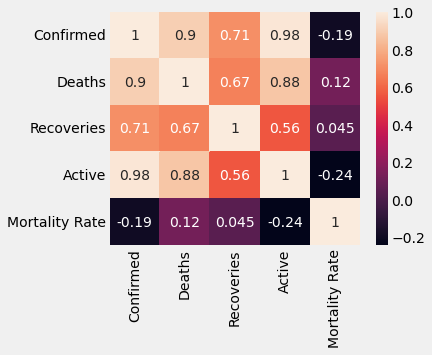

In [ ]:
# plot covariance matrix
corr = continents_df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr,annot=True)
plt.show()

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

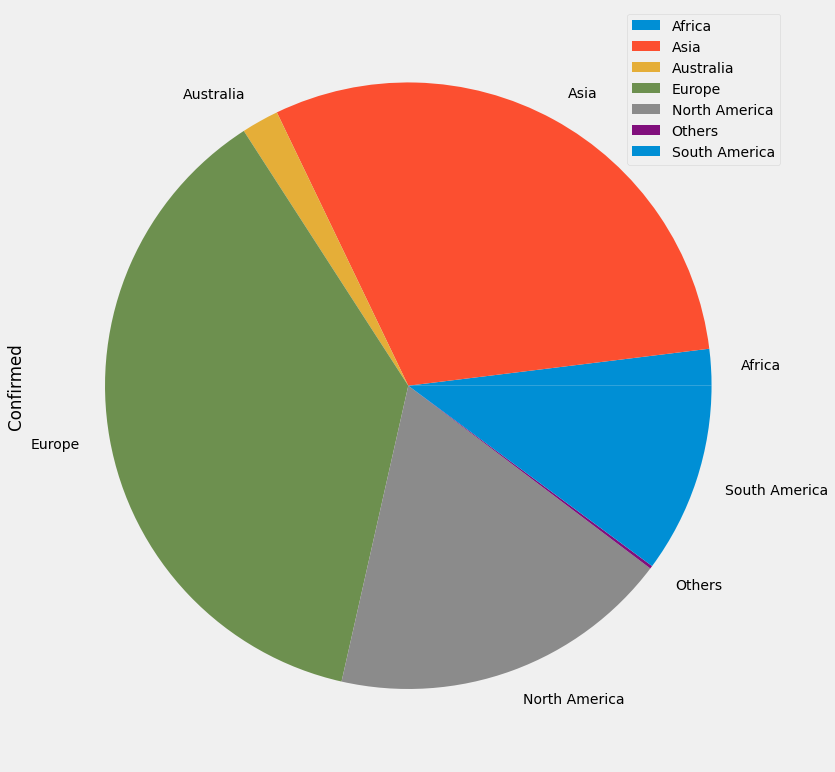

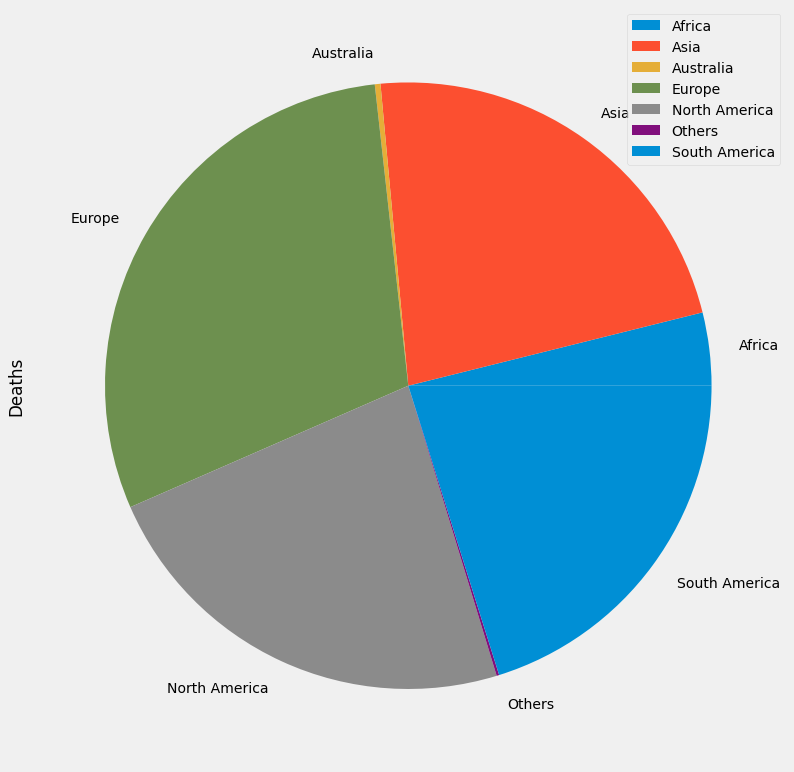

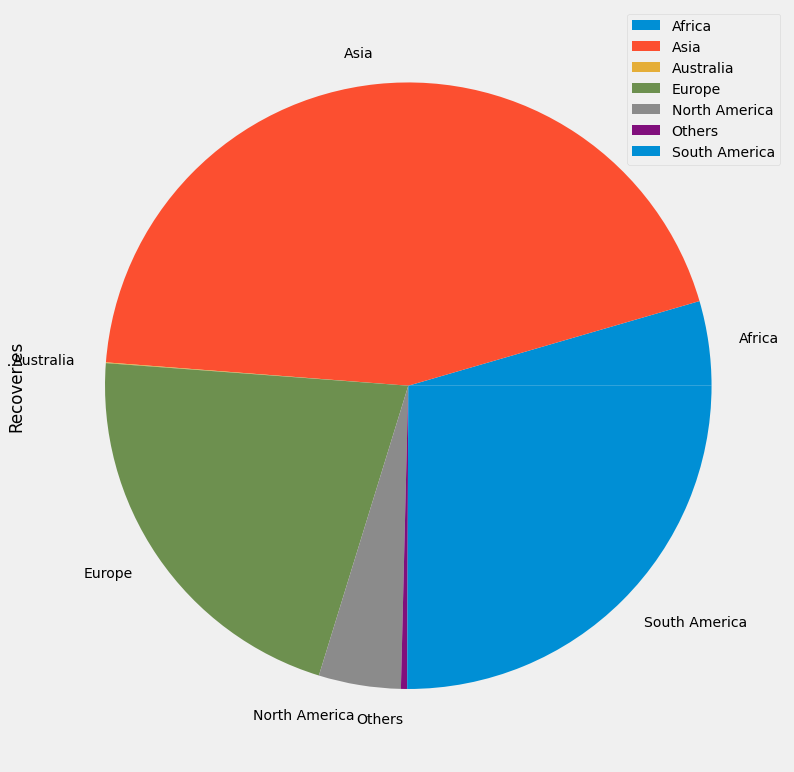

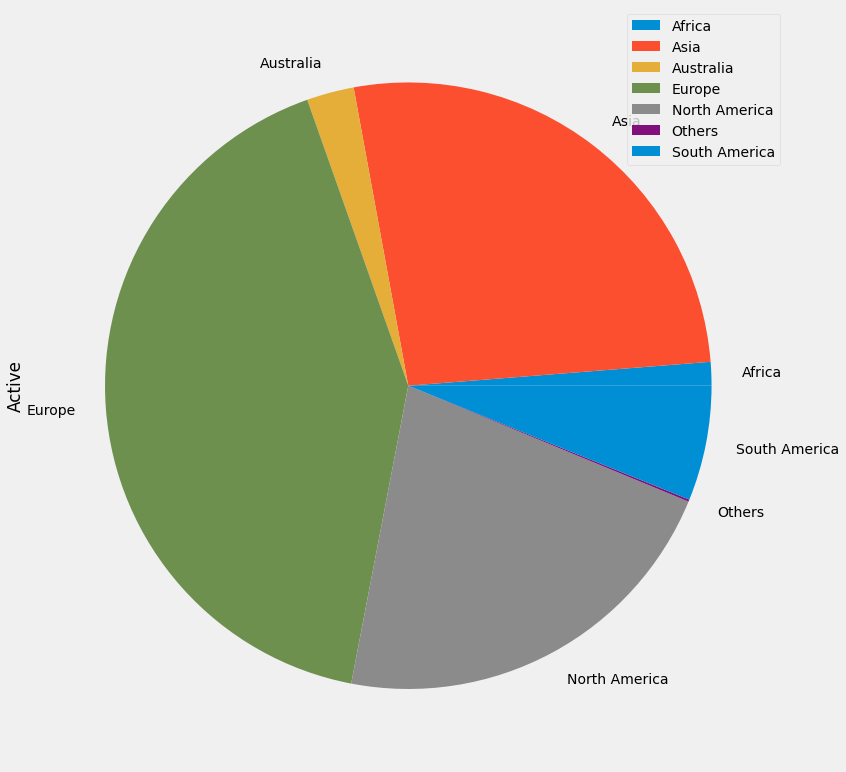

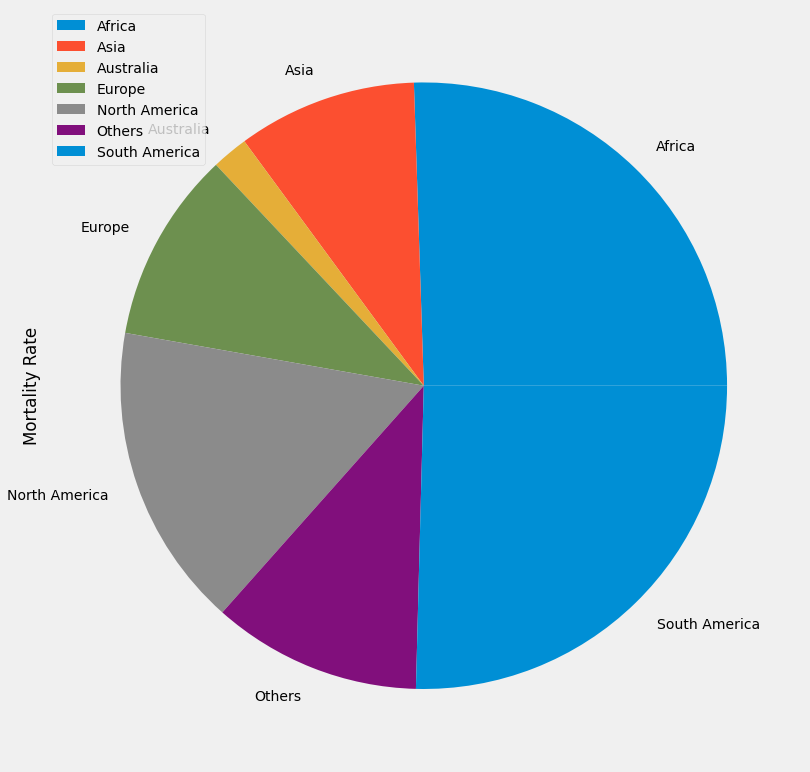

In [ ]:
# use for loop to draw each case
for cases in continents_df.columns:
    continents_df.plot(kind='pie', y = cases, figsize=(13,13))
    plt.show()

# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [ ]:
# reset index to prepare for get country code
confirmed_groupby = confirmed_groupby.reset_index()
deaths_groupby = deaths_groupby.reset_index()

In [ ]:
# define function convert country name to code
def country_to_country_code(country):
    try:
        return pc.country_name_to_country_alpha2(country)
    except :
        return 'na'

In [ ]:
# get country code
lst_code_country_confirmed = []
for i in confirmed_groupby['Country/Region']:
    lst_code_country_confirmed.append(country_to_country_code(i))
    
lst_code_country_deaths = []
for i in deaths_groupby['Country/Region']:
    lst_code_country_deaths.append(country_to_country_code(i))

In [ ]:
# conver to dataframe
lst_code_country_confirmed = pd.DataFrame(lst_code_country_confirmed)
lst_code_country_deaths = pd.DataFrame(lst_code_country_deaths)

In [ ]:
# rename dataframe country code
lst_code_country_confirmed = lst_code_country_confirmed.rename(columns={0: "alpha2"})
lst_code_country_deaths = lst_code_country_deaths.rename(columns={0: "alpha2"})

In [ ]:
# insert country code to dataframe confrmed
confirmed_groupby.insert(1, 'alpha2', lst_code_country_confirmed.iloc[:,-1])
deaths_groupby.insert(1, 'alpha2', lst_code_country_deaths.iloc[:,-1])

In [ ]:
confirmed_groupby

,Country/Region,alpha2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22
0,Afghanistan,AF,0,0,0,0,0,0,0,0,...,203942,204094,204287,204392,204417,204510,204610,204724,204820,204982
1,Albania,AL,0,0,0,0,0,0,0,0,...,333071,333088,333103,333125,333138,333156,333161,333197,333215,333233
2,Algeria,DZ,0,0,0,0,0,0,0,0,...,270891,270906,270917,270924,270929,270939,270952,270969,270981,270996
3,Andorra,AD,0,0,0,0,0,0,0,0,...,46588,46664,46664,46664,46664,46664,46664,46664,46824,46824
4,Angola,AO,0,0,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,West Bank and Gaza,na,0,0,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
197,Winter Olympics 2022,na,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
198,Yemen,YE,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
199,Zambia,ZM,0,0,0,0,0,0,0,0,...,333685,333685,333685,333685,333685,333685,333685,333685,333685,333685


In [ ]:
confirmed_groupby.replace("na", np.nan, inplace = True)
deaths_groupby.replace("na", np.nan, inplace = True)

In [ ]:
confirmed_groupby.dropna(inplace=True)
deaths_groupby.dropna(inplace=True)

In [ ]:
deaths_groupby

,Country/Region,alpha2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22
0,Afghanistan,AF,0,0,0,0,0,0,0,0,...,7829,7829,7829,7829,7829,7829,7829,7829,7830,7830
1,Albania,AL,0,0,0,0,0,0,0,0,...,3593,3593,3593,3593,3593,3593,3594,3594,3594,3594
2,Algeria,DZ,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,AD,0,0,0,0,0,0,0,0,...,155,155,155,155,155,155,155,155,156,156
4,Angola,AO,0,0,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Venezuela,VE,0,0,0,0,0,0,0,0,...,5823,5823,5823,5824,5824,5824,5824,5825,5825,5825
195,Vietnam,VN,0,0,0,0,0,0,0,0,...,43166,43166,43166,43166,43166,43166,43166,43166,43167,43167
198,Yemen,YE,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
199,Zambia,ZM,0,0,0,0,0,0,0,0,...,4017,4017,4017,4017,4017,4017,4017,4017,4017,4017


In [ ]:
# define world map
world_map = folium.Map()

In [ ]:
!wget -q https://raw.githubusercontent.com/VuongDS/ExcersiceDS/main/lat-long.txt

In [ ]:
# open file geojson contain infomation of countries geo
locations = json.load(open('lat-long.txt', 'r'))

In [ ]:
# get info needed in geojson file
latlong = pd.DataFrame(locations['ref_country_codes'])
latlong = latlong.drop(['country','alpha3','numeric'], axis = 1)

In [ ]:
# check again
latlong.head()

,alpha2,latitude,longitude
0,AL,41.0000,20.0
1,DZ,28.0000,3.0
2,AS,-14.3333,-170.0
3,AD,42.5000,1.6
4,AO,-12.5000,18.5


In [ ]:
# map two dataframe with key alpha2
confirmed_groupby = confirmed_groupby.merge(latlong, how='inner', on='alpha2')

In [ ]:
# check after merge
confirmed_groupby.head()

,Country/Region,alpha2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22,latitude,longitude
0,Afghanistan,AF,0,0,0,0,0,0,0,0,...,204287,204392,204417,204510,204610,204724,204820,204982,33.0,65.0
1,Albania,AL,0,0,0,0,0,0,0,0,...,333103,333125,333138,333156,333161,333197,333215,333233,41.0,20.0
2,Algeria,DZ,0,0,0,0,0,0,0,0,...,270917,270924,270929,270939,270952,270969,270981,270996,28.0,3.0
3,Andorra,AD,0,0,0,0,0,0,0,0,...,46664,46664,46664,46664,46664,46664,46824,46824,42.5,1.6
4,Angola,AO,0,0,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,-12.5,18.5


In [ ]:
# move position of Lat and Long
confirmed_groupby.insert(2, 'Lat', confirmed_groupby.iloc[:,-2])
confirmed_groupby.insert(3, 'Long', confirmed_groupby.iloc[:,-1])
# drop old name
confirmed_groupby = confirmed_groupby.drop(['latitude','longitude'], axis =1)

In [ ]:
# check after move position
confirmed_groupby.head()

,Country/Region,alpha2,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22
0,Afghanistan,AF,33.0,65.0,0,0,0,0,0,0,...,203942,204094,204287,204392,204417,204510,204610,204724,204820,204982
1,Albania,AL,41.0,20.0,0,0,0,0,0,0,...,333071,333088,333103,333125,333138,333156,333161,333197,333215,333233
2,Algeria,DZ,28.0,3.0,0,0,0,0,0,0,...,270891,270906,270917,270924,270929,270939,270952,270969,270981,270996
3,Andorra,AD,42.5,1.6,0,0,0,0,0,0,...,46588,46664,46664,46664,46664,46664,46664,46664,46824,46824
4,Angola,AO,-12.5,18.5,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131


In [ ]:
deaths_groupby.head()

,Country/Region,alpha2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22
0,Afghanistan,AF,0,0,0,0,0,0,0,0,...,7829,7829,7829,7829,7829,7829,7829,7829,7830,7830
1,Albania,AL,0,0,0,0,0,0,0,0,...,3593,3593,3593,3593,3593,3593,3594,3594,3594,3594
2,Algeria,DZ,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,AD,0,0,0,0,0,0,0,0,...,155,155,155,155,155,155,155,155,156,156
4,Angola,AO,0,0,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


In [ ]:
# draw map use folium Circle
for i in range(0,len(confirmed_groupby)):
    folium.Circle(
        location=[confirmed_groupby.iloc[i]['Lat'], confirmed_groupby.iloc[i]['Long']],
        # tooltip for show info when moving the mouse to any position
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+confirmed_groupby.iloc[i]['Country/Region']+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(confirmed_groupby.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(deaths_groupby.iloc[i,-1])+"</li>"+
        "<li>Recoveries:   "+str(confirmed_groupby.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(deaths_groupby.iloc[i,-1]/(confirmed_groupby.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>",
        # use log radius for more friendly image display
        radius= (int((np.log(confirmed_groupby.iloc[i,-1]+1.00001)))+0.2)*50000, 
        # set orange color
        color='#ff6600', fill_color='#ff8533', fill=True).add_to(world_map)
world_map

# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [ ]:
active = active.reset_index()

In [ ]:
# draw map to show number of active

fig = px.choropleth(active, 
                    # determine location by "Country/Region"
                    locations="Country/Region",
                    
                    # asign color for colum of number active
                    color=np.log10(active.iloc[:, -1]), 
                    
                    # build a continuous color scal
                    color_continuous_scale=px.colors.sequential.Plasma,
                    
                    # set country name to show up on location
                    locationmode="country names") 

# Set the plot's title. 
fig.update_layout(title_text="Active Cases Heat Map (Log Scale)") 

# Sets title of colorbar, colorscale
fig.update_coloraxes(colorbar_title="Active Cases(Log Scale)",colorscale="Blues") 

fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in log10



# Problem 16
    Filter the top 10 countries based on the number of confirmed cases.

In [ ]:
countries_df_top10 = countries_df.reset_index()

In [ ]:
# sort value by desc
countries_df_top10 = countries_df_top10.sort_values(by='Confirmed', ascending=False)

In [ ]:
# keep top 10 countries
countries_df_top10 = countries_df_top10.iloc[:10,:]

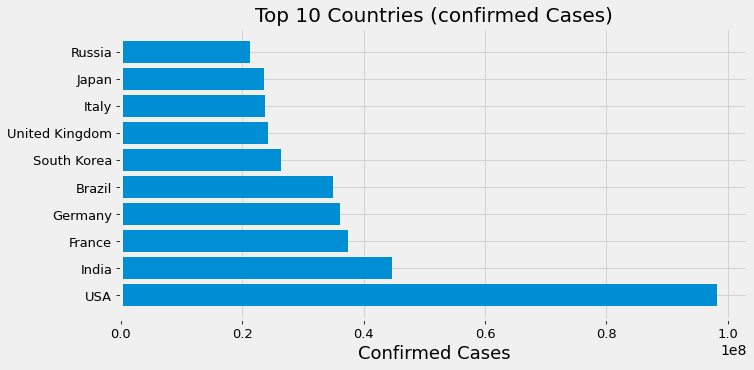

In [ ]:
# Plot figure after filter

# define figure, width, height in inches.
f = plt.figure(figsize=(10,5)) 

# draw in position 1
f.add_subplot(111) 

# use barh chart to draw
plt.barh(
    # determine y axis
    countries_df_top10['Country/Region'],
    # determine x axis
    countries_df_top10['Confirmed'])

# Change the appearance of ticks, tick labels
plt.tick_params(size=5,labelsize = 13) 

# set label and title of chart
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (confirmed Cases)",fontsize=20)

# Configure the grid lines
plt.grid(alpha=0.8,which='both') 

plt.show()

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [ ]:
#Insert your code here:
countries_df_top10

,Country/Region,continents,Confirmed,Deaths,Recoveries,Active,Mortality Rate
186,USA,North America,98245940,1076492,0,97169448,1.095711
78,India,Asia,44667967,530553,30857467,13279947,1.187771
61,France,Europe,37471008,159129,413278,36898601,0.424672
65,Germany,Europe,36180077,156410,3654720,32368947,0.43231
24,Brazil,South America,34971043,688835,17771228,16510980,1.96973
165,South Korea,Asia,26462319,29925,176605,26255789,0.113085
190,United Kingdom,Europe,24203583,212085,21083,23970415,0.876255
84,Italy,Europe,23823192,179985,4135930,19507277,0.755503
86,Japan,Asia,23540544,47974,839090,22653480,0.203793
146,Russia,Europe,21214339,383381,5556831,15274127,1.807179


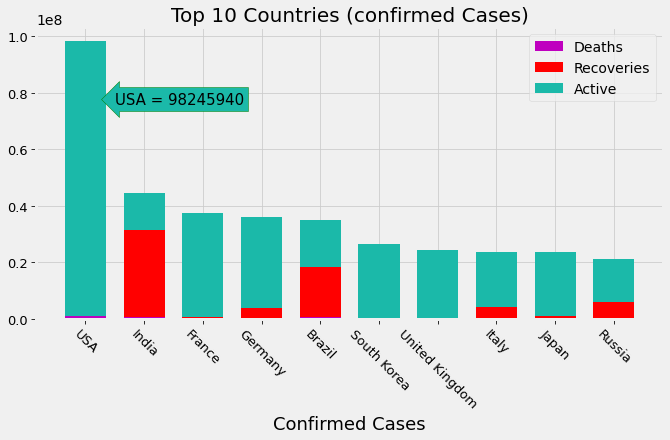

In [ ]:
# draw stacked bar chart to visualize the top 10 confirmed countries

# define figure with width and height size
f = plt.figure(figsize=(10,5))

# draw in position 1 of figure
f.add_subplot(111) 

width = 0.7

# draw barh chart
plt.bar(countries_df_top10['Country/Region'],countries_df_top10['Deaths'], color='m', width = width) 

# draw Recoveries under Deaths
plt.bar(countries_df_top10['Country/Region'],countries_df_top10['Recoveries'], 
        bottom=countries_df_top10['Deaths'], color='r', width = width) 

# draw Active under Recoveries and Deaths
plt.bar(countries_df_top10['Country/Region'],countries_df_top10['Active'], 
        bottom=(countries_df_top10['Recoveries']+countries_df_top10['Deaths']), color='#1BB9A9', width = width) 

# set legend
plt.legend(["Deaths", "Recoveries", "Active"])

# Change the size of ticks, tick labels
plt.tick_params(size=5,labelsize = 13)

# set label and title
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (confirmed Cases)",fontsize=20)

# Configure the grid lines.
plt.grid(alpha=0.8,which='both') 

# resolve overlap by rotation tick label
plt.xticks(countries_df_top10['Country/Region'], rotation =-45) 

# draw interested info box 
plt.text(
        # determine position
        0.5,76000000,
    
        # format text showing
         'USA = {}'.format(countries_df_top10.iloc[0,2]),
    
        # define font size
         fontsize=15,
    
        # set box format contain text content
         bbox=dict(
             # set style of box
             boxstyle="larrow",
             # set color for pad and rim
             fc='#1BB9A9', ec="g"))
plt.show()

# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

In [5]:
# !wget -q https://github.com/VuongDS/ExcersiceDS/blob/main/q18.png
# !wget -q https://github.com/VuongDS/ExcersiceDS/blob/main/q18_2.png

In [6]:
from IPython.display import Image

Answer:
The COVID 2019 epidemic in the world has reached its peak because on 'Problem 4', we can see :
+ 'World Daily Increase Confirmed Cases' has been down strongly

+ Besides that, 'World Daily Increase Deaths Cases' has been also a significant decline
We can conclude that COVID 2019 has been down

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


In [ ]:
# 19.2
# groupby confirmed cases by continent
confirmed_df_10day = confirmed_df.groupby('continents').sum()

In [ ]:
# calculate number of new confirmed in the last 10 days
new_10days = confirmed_df_10day.iloc[:,-10:-1].sum(axis = 1)

In [ ]:
# calculate Spread rate
confirmed_df_10day_spread = pd.DataFrame(new_10days/confirmed_df_10day.iloc[:,-1])

In [ ]:
# rename
confirmed_df_10day_spread = confirmed_df_10day_spread.rename(columns = {0:'Spread_rate'})

In [ ]:
# sorting spread rate by descending
"""
As below results, we can see the continent has the highest spread rate on COVID 2019 
on 4/21/2022 is "Others"
"""
confirmed_df_10day_spread = confirmed_df_10day_spread.sort_values('Spread_rate', ascending = False)
confirmed_df_10day_spread

,Spread_rate
continents,
Others,8.999909
Africa,8.995383
South America,8.984234
North America,8.979959
Europe,8.978261
Asia,8.953713
Australia,8.931080


In [ ]:
# 19.1
continents_df.sort_values('Mortality Rate', ascending = False)
# We can see at below results, the highest 'Mortality Rate' belong to 'South America'
# Results valid on 4/21/2022

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continents,,,,,
Africa,12403599,257297,5853568,6292734,2.074374
South America,64571213,1333855,32573979,30663379,2.065712
North America,116167923,1532082,5687235,108948606,1.318851
Others,1000713,9069,428222,563422,0.906254
Europe,237870110,1971500,27851372,208047238,0.828814
Asia,192278113,1493915,57547778,133236420,0.776955
Australia,12686637,19981,52235,12614421,0.157496


In [ ]:
# 19.3
# Calculate recoveries rate and add to dataframe
continents_recoveries_df = pd.DataFrame((continents_df['Recoveries']/continents_df['Confirmed'])*100)
continents_recoveries_df.columns = ['Recoveries Rate']
continents_rec_df = pd.concat([continents_df, continents_recoveries_df['Recoveries Rate']], axis = 1)

In [ ]:
# sort 'Recoveries Rate' by descending
continents_rec_df = continents_rec_df.sort_values('Recoveries Rate', ascending = False)
continents_rec_df
# We can see at below results, the highest 'Recoveries Rate' belong to 'South America'
# Results valid on 4/21/2022

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Recoveries Rate
continents,,,,,,
South America,64571213,1333855,32573979,30663379,2.065712,50.446596
Africa,12403599,257297,5853568,6292734,2.074374,47.192496
Others,1000713,9069,428222,563422,0.906254,42.791690
Asia,192278113,1493915,57547778,133236420,0.776955,29.929448
Europe,237870110,1971500,27851372,208047238,0.828814,11.708647
North America,116167923,1532082,5687235,108948606,1.318851,4.895702
Australia,12686637,19981,52235,12614421,0.157496,0.411732


# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

In [ ]:
# 20.1: the highest death rate
countries_df = countries_df.sort_values('Mortality Rate', ascending = False)
countries_df.head()
# We can see at below results, the highest 'Mortality Rate' belong to 'MS Zaandam'
# Results valid on 4/21/2022

,continents,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
"Korea, North",Others,1,6,0,-5,600.0
MS Zaandam,Others,9,2,7,0,22.222222
Yemen,Asia,11945,2159,4200,5586,18.074508
Sudan,Africa,63595,4981,30647,27967,7.832377
Syria,Asia,57385,3163,21995,32227,5.511893


In [ ]:
# 20.3: the highest recoveries rate
# Calculate recoveries rate and add to dataframe
countries_recoveries_df = pd.DataFrame((countries_df['Recoveries']/countries_df['Confirmed'])*100)
countries_recoveries_df.columns = ['Recoveries Rate']
countries_rec_df = pd.concat([countries_df, countries_recoveries_df['Recoveries Rate']], axis = 1)

In [ ]:
# sort 'Recoveries Rate' by descending
countries_rec_df = countries_rec_df.sort_values('Recoveries Rate', ascending = False)
countries_rec_df.head()
# We can see at below results, the highest 'Recoveries Rate' belong to 'Micronesia'
# Results valid on 4/21/2022

,continents,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Recoveries Rate
Country/Region,,,,,,,
Diamond Princess,Others,712,13,699,0,1.825843,98.174157
Holy See,Others,29,0,27,2,0.0,93.103448
Tajikistan,Asia,17786,125,14556,3105,0.7028,81.839649
MS Zaandam,Others,9,2,7,0,22.222222,77.777778
Djibouti,Africa,15690,189,11490,4011,1.204589,73.231358


In [ ]:
# 20.2: the highest rate on COVID 2019 spread rate
# groupby confirmed cases by countries
confirmed_df_coun_10day = confirmed_df.groupby('Country/Region').sum()

In [ ]:
# calculate number of new confirmed in the last 10 days
new_coun_10days = confirmed_df_coun_10day.iloc[:,-10:-1].sum(axis = 1)

In [ ]:
# calculate Spread rate
confirmed_df_10day_coun_spread = pd.DataFrame(new_coun_10days/confirmed_df_coun_10day.iloc[:,-1])

In [ ]:
# sorting spread rate by descending
"""
As below results, we can see the country has the highest spread rate on COVID 2019 
on 4/21/2022 is "Iceland"
"""
confirmed_df_10day_coun_spread = confirmed_df_10day_coun_spread.rename(columns = {0:'Spread_rate'})
confirmed_df_10day_coun_spread = confirmed_df_10day_coun_spread.sort_values('Spread_rate', ascending = False)
confirmed_df_10day_coun_spread.head()

,Spread_rate
Country/Region,
Malawi,9.00059
Zimbabwe,9.00000
Micronesia,9.00000
Marshall Islands,9.00000
MS Zaandam,9.00000


# Problem 21
**USA dataset**

In [ ]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

In [ ]:
# 21.1: Check dataframe
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2020-07-07 04:34:13,32.3182,-86.9023,44932,1007,22082.0,21843.0,1,...,NaN,2914.0,NaN,84000001.0,USA,NaN,6.493159,2020-07-06,663719.0,2.241164
1,Alaska,US,2020-07-07 04:34:13,61.3707,-152.4044,1184,16,548.0,620.0,2,...,NaN,NaN,NaN,84000002.0,USA,16916.662680,NaN,2020-07-06,123753.0,1.351351
2,American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,NaN,NaN,60,...,NaN,NaN,NaN,16.0,ASM,1250.876152,NaN,2020-07-06,696.0,NaN
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,...,NaN,5188.0,NaN,84000004.0,USA,8488.322873,5.113597,2020-07-06,873294.0,1.802770
4,Arkansas,US,2020-07-07 04:34:13,34.9697,-92.3731,24253,292,17834.0,6127.0,5,...,NaN,1575.0,NaN,84000005.0,USA,11431.093603,6.494042,2020-07-06,344968.0,1.203975


In [ ]:
# Calculate death_rate
death_rate = pd.DataFrame((us_medical_data.iloc[:]['Deaths']/us_medical_data.iloc[:]['Confirmed'])*100)
death_rate = death_rate.rename(columns = {0:"death_rate"})

In [ ]:
# Insert death_rate to dataframe
us_medical_data.insert(5, 'death_rate', death_rate.iloc[:,-1])

In [ ]:
# Sort values to determine highest death_rate
"""
As below results, we can see the state has the highest spread rate on COVID 2019 
on 4/21/2022 is "Connecticut"
"""
us_medical_data = us_medical_data.sort_values('death_rate', ascending = False)
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,death_rate,Confirmed,Deaths,Recovered,Active,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
7,Connecticut,US,2020-07-07 04:34:13,41.5978,-72.7554,9.234503,46976,4338,8210.0,34428.0,...,NaN,10411.0,NaN,84000009.0,USA,14707.483577,22.162381,2020-07-06,524364.0,9.234503
34,New Jersey,US,2020-07-07 04:34:13,40.2989,-74.5210,8.713937,174766,15229,30729.0,128808.0,...,NaN,20237.0,NaN,84000034.0,USA,17441.745786,11.656519,2020-07-06,1549209.0,8.713937
26,Michigan,US,2020-07-07 04:34:13,43.3266,-84.5361,8.490862,73267,6221,52841.0,14205.0,...,1177247.0,NaN,NaN,84000026.0,USA,0.000001,NaN,2020-07-06,1159363.0,8.490862
36,New York,US,2020-07-07 04:34:13,42.1657,-74.9481,8.061632,397649,32057,71040.0,294552.0,...,4288131.0,89995.0,NaN,84000036.0,USA,22042.910293,22.631768,2020-07-06,4288131.0,8.061632
25,Massachusetts,US,2020-07-07 04:34:13,42.2302,-71.5301,7.443457,110137,8198,93157.0,8782.0,...,1168234.0,11469.0,NaN,84000025.0,USA,0.000002,10.413394,2020-07-06,899417.0,7.443457


In [ ]:
# 21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
# no data of 'nummber of new confirmed in the last 10 days'
# so using Incident_Rate to represent
"""
As below results, we can see the state has the highest spread rate on COVID 2019 
on 4/21/2022 is "New York"
"""
us_medical_data = us_medical_data.sort_values('Incident_Rate', ascending = False)
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,death_rate,Confirmed,Deaths,Recovered,Active,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
36,New York,US,2020-07-07 04:34:13,42.1657,-74.9481,8.061632,397649,32057,71040.0,294552.0,...,4288131.0,89995.0,NaN,84000036.0,USA,22042.910293,22.631768,2020-07-06,4288131.0,8.061632
34,New Jersey,US,2020-07-07 04:34:13,40.2989,-74.5210,8.713937,174766,15229,30729.0,128808.0,...,NaN,20237.0,NaN,84000034.0,USA,17441.745786,11.656519,2020-07-06,1549209.0,8.713937
45,Rhode Island,US,2020-07-07 04:34:13,41.6809,-71.5118,5.838385,16991,992,1657.0,14342.0,...,NaN,2019.0,NaN,84000044.0,USA,23689.186217,11.882761,2020-07-06,250954.0,5.838385
25,Massachusetts,US,2020-07-07 04:34:13,42.2302,-71.5301,7.443457,110137,8198,93157.0,8782.0,...,1168234.0,11469.0,NaN,84000025.0,USA,0.000002,10.413394,2020-07-06,899417.0,7.443457
10,District of Columbia,US,2020-07-07 04:34:13,38.8974,-77.0268,5.335235,10515,561,1553.0,8401.0,...,NaN,NaN,NaN,84000011.0,USA,15253.298269,NaN,2020-07-06,107650.0,5.335235


In [ ]:
# 21.3 Which state has the highest recoveries rate over states' dataset?
"""
As below results, we can see the state has the highest spread rate on COVID 2019 
on 4/21/2022 is "Texas"
"""
us_medical_data = us_medical_data.sort_values('Recovered', ascending = False)
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,death_rate,Confirmed,Deaths,Recovered,Active,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
49,Texas,US,2020-07-07 04:34:13,31.0545,-97.5635,1.405145,204534,2874,103782.0,97880.0,...,NaN,NaN,NaN,84000048.0,USA,7462.194372,NaN,2020-07-06,2163729.0,1.404168
25,Massachusetts,US,2020-07-07 04:34:13,42.2302,-71.5301,7.443457,110137,8198,93157.0,8782.0,...,1168234.0,11469.0,NaN,84000025.0,USA,0.000002,10.413394,2020-07-06,899417.0,7.443457
36,New York,US,2020-07-07 04:34:13,42.1657,-74.9481,8.061632,397649,32057,71040.0,294552.0,...,4288131.0,89995.0,NaN,84000036.0,USA,22042.910293,22.631768,2020-07-06,4288131.0,8.061632
43,Pennsylvania,US,2020-07-07 04:34:13,40.5908,-77.2098,7.160177,94439,6762,70437.0,17240.0,...,NaN,NaN,NaN,84000042.0,USA,6509.332261,NaN,2020-07-06,1018320.0,7.160177
37,North Carolina,US,2020-07-07 04:34:13,35.6301,-79.8064,1.915079,74775,1432,55318.0,18025.0,...,NaN,NaN,NaN,84000037.0,USA,NaN,NaN,2020-07-06,1051846.0,1.915079
